Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma]


/home/kal/Desktop/KAIM/week_11/brent-oil-change-point-analysis/venv/lib/python3.10/site-packages/rich/live.py:260: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 49 seconds.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'mu_1'}>,
       <Axes: title={'center': 'mu_2'}>], dtype=object)

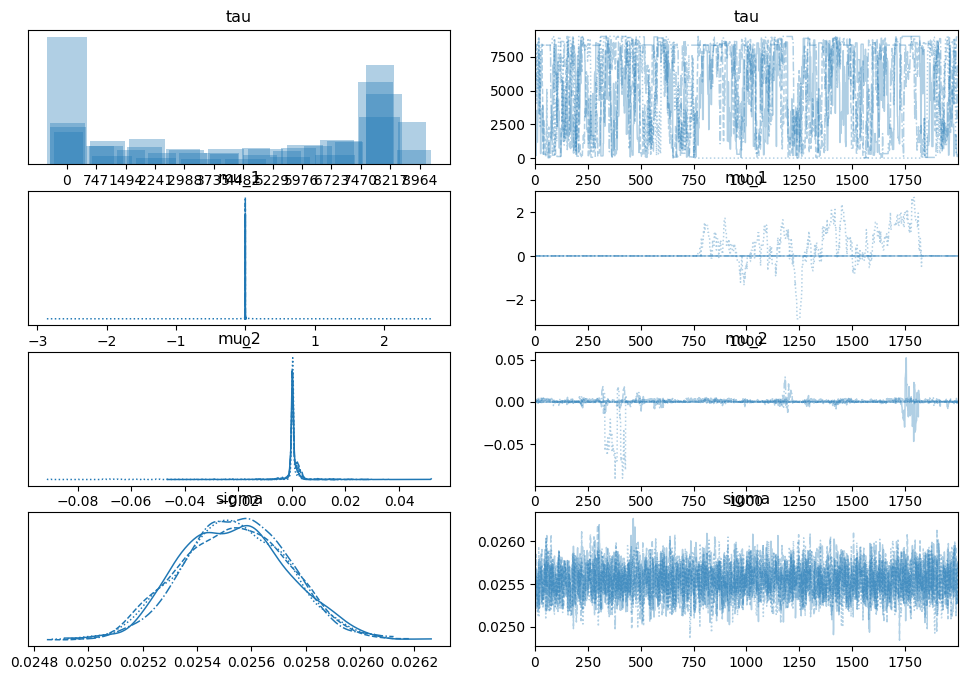

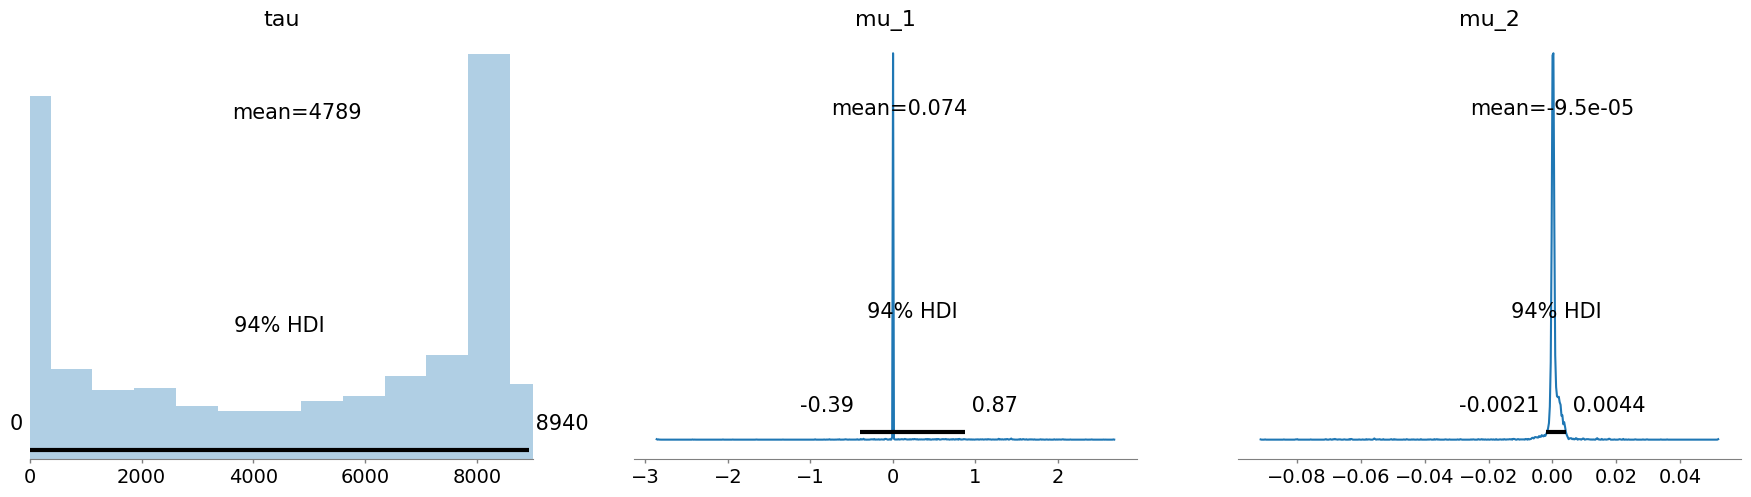

In [3]:
import pandas as pd
import arviz as az
import sys
import os

# Add the parent folder of notebooks to sys.path
sys.path.append(os.path.abspath(os.path.join("..")))

from src.modeling.bayesian_changepoint import bayesian_change_point

df = pd.read_csv("../data/processed/log_returns.csv")
returns = df["log_return"].values

model, trace = bayesian_change_point(returns)

az.summary(trace)
az.plot_trace(trace)
az.plot_posterior(trace, var_names=["tau", "mu_1", "mu_2"])
